In [1]:
%matplotlib inline


# Nhận dạng chữ số viết tay

Bài tập này chúng ta sẽ sử dụng thư viện scikit-learn để nhận diện chữ số viết tay với các số từ 0 tới 9


Import các thư viện cần thiết

In [2]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt
from collections import Counter
import plotly.graph_objects as go
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

Automatically created module for IPython interactive environment


## Bộ dữ liệu về chữ số

Bộ dữ liệu về chữ số dưới đây là tập hợp của các ảnh với kích thước 8x8. 
- Trường ``images`` trong bộ dữ liệu của chúng ta là một tập hợp của các mảng có kích thước 8x8 với các giá trị mức xám cho mỗi ảnh
- Trường ``target`` trong bộ dữ liệu chứa các giá trị là chữ số mà mỗi ảnh đại diện cho 

Chúng ta có hình ảnh minh họa của bộ dữ liệu ở phía dưới đây



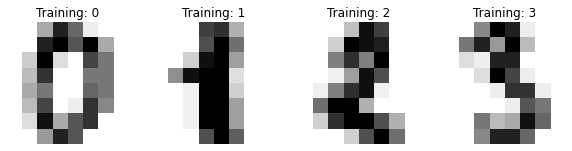

In [3]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

Bộ dữ liệu của chúng ta có 1792 ảnh và tất cả các ảnh đều được gán nhãn đầy đủ

In [6]:
digits_counter = Counter(digits.target)
digits_counter_keys = list(digits_counter.keys())
digits_counter_values = list(digits_counter.values())

Ta có biểu đồ phân bố của mỗi nhãn trên mỗi chữ số ở bên dưới

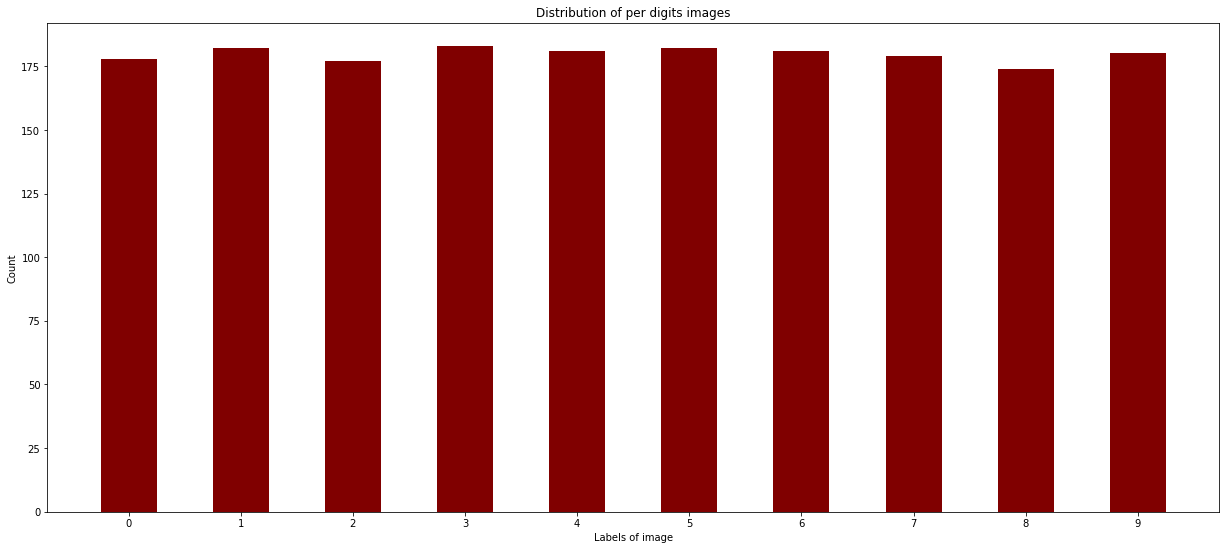

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (21, 9))
plt.bar(digits_counter_keys, digits_counter_values, color ='maroon', width = 0.5)

plt.xticks(digits_counter_keys)
plt.xlabel("Labels of image")
plt.ylabel("Count")
plt.title("Distribution of per digits images")
plt.show()

Thông qua biểu đồ trên ta có một số nhận xét như sau:
- Thứ nhất, là hầu hết số lượng của mỗi chữ số đều khoảng xấp xỉ bằng nhau -> Dữ liệu của chúng ta khá cân bằng, không phải lo về việc model của chúng ta bị bias qua các features có số lượng nhiều hơn

## Classification


Để áp dụng một mô hình phân lớp cho dữ liệu của chúng ta, chúng ta cần vector hóa bức ảnh bằng cách biến đổi từ mảng hai chiều với kich thước ``(8, 8)`` thành một vector với số chiều ``(64,)``

Chúng ta phân chia dữ liệu thành hai phần là ```train``` và ```test```


Ở đây chúng ta sử dụng phương pháp SVM của hệ số gamma là ```0.001``` và tune siêu tham số bằng ```GridSearchCV```

In [129]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
svc = svm.SVC(gamma=0.001)

# Using GridSearchCV to tunning hyperparmaters
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 100]}
clf = GridSearchCV(svc, parameters)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=True)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
y_predicted = clf.predict(X_test)

Phía dưới đây là 4 kết quả được chọn ngẫu nhiên từ mô hình phân lớp cho bộ dữ liệu test 

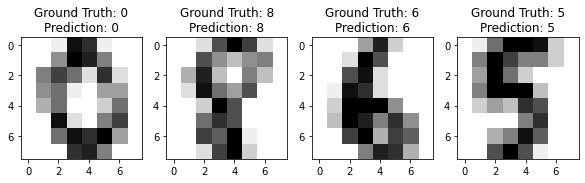

In [130]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, gt, prediction in zip(axes, X_test, y_test, y_predicted):
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Ground Truth: {gt}\nPrediction: {prediction}')

:func:`~sklearn.metrics.classification_report`  dùng hàm này để trả về một bảng báo cáo về các kết quả độ đo trong bài toán phân lớp



In [131]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, y_predicted)}\n")

Classification report for classifier GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.001,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 100], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        79
           1       1.00      0.99      0.99        98
           2       0.99      1.00      0.99        90
           3       0.98      0.95      0.97        88
           4       0.99      

Chúng ta có thể sử dụng **ma trận nhầm lẫn** `confusion matrix <confusion_matrix>` để theo dõi một cách trực quan các trường hợp bị lỗi


Confusion matrix:
[[78  0  0  0  1  0  0  0  0  0]
 [ 0 97  0  0  0  1  0  0  0  0]
 [ 0  0 90  0  0  0  0  0  0  0]
 [ 0  0  1 84  0  1  0  0  2  0]
 [ 0  0  0  0 89  0  0  0  0  0]
 [ 0  0  0  0  0 97  0  0  0  2]
 [ 0  0  0  0  0  0 89  0  0  0]
 [ 0  0  0  0  0  0  0 84  0  1]
 [ 0  0  0  1  0  0  0  0 87  0]
 [ 0  0  0  1  0  1  0  0  1 91]]


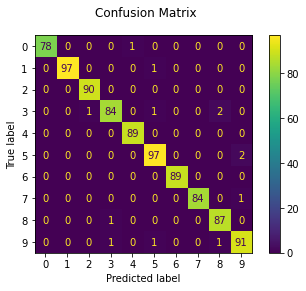

In [132]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Sử dụng webcam để thử nghiệm của bộ dữ liệu từ chữ số viết tay từ người dùng

In [12]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [118]:
my_data = []

In [ ]:
import os
from IPython.display import Image

# Tạo file lưu ảnh vừa chụp
dir = 'images'  #directory
if not os.path.exists(dir):
    os.makedirs(dir)

# get file directory
def image_name(n):
  return f'{dir}/image-{n}.jpg'

try:
  # Tăng i làm tên file tránh ghi đè ảnh cũ
  i = 0
  while os.path.isfile(image_name(i)):
    i += 1
  filename = take_photo(image_name(i))
  print('Saved to {}'.format(filename))
  
  # Ảnh vừa chụp
  display(Image(filename))

  # Gán label cho ảnh vừa chụp
  while True:
    label = int(input("Please label your image: "))
    if label not in range(0, 10):
      continue
    else: 
      break

  my_data.append([label, filename])

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
'''
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
'''

In [ ]:
print(my_data)

In [ ]:
img = cv2.imread(my_data[9][1])
cv2_imshow(img)
img = cv2.resize(img, (8, 8), interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
img = 16-(img/16)
print('Predicted label:', clf.predict([img.flatten()])[0])

# **Trả lời câu hỏi bài tập**

---


# Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?

* Kết quả chạy thực tế bằng webcam của laptop rất khác biệt so với kết quả của dữ liệu test. Có thể kết luận rằng kết quả chưa tốt.

#Ủa mà nhìn vào đâu để kết luận là tốt hay không?
Nhìn vào kết quả đầu ra và nhãn của ảnh đưa vào.

*   Nhìn vào kết quả đầu ra và nhãn của ảnh đưa vào.
* Các test dự đoán không tốt như image-0.jpg, image-1.jpg, image-3.jpg, image-4.jpg, image-5.jpg, image-6.jpg.

#Nếu không tốt thì lý do tại sao?


* Thực tế ảnh chịu ảnh hưởng cực lớn bởi các yếu tố bên ngoài ví dụ như: ánh sáng, độ tương phản, nét viết đậm nhạt,nền chữ số không hoàn toàn trắng, góc chụp, v.v .
* Bước tiền xử lý ảnh có thể làm mất mát thông tin của bức ảnh.
* Lượng ảnh trong dataset khá nhỏ chỉ 1792 ảnh.

#Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

* Câu trả lời là không. Bởi hạn chế lớn nhất của dataset chỉ nhận diện được giá trị trong khoảng [0,9] và rất ít số nhà trong thực tế thỏa điều kiện nêu trên.







